In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Alameda County Jury Panels

The table `jury` is the data from the report


In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury
# There were 1,453 people in all the panels

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


### Do the distributions of the panels and eligle jurors look the same?

What type of figure can we use to look at this?

Let's show the figure in the next cell:
<details>
<summary>Solution</summary>
  jury.barh('Ethnicity')
</details>


#### From the visualziation do they look similar?

<details>
<summary>Solution</summary>
  Yes!
</details>


Is this variation that we are seeing, could it have happened due to chance?

We'll answer this once we have a new statistic

(back to slides)
### Differences between the distributions

Let's make a new Table where we add a new columns that represents the line by line difference

<details>
<summary>Solution</summary>
  Yes!
</details>

In [8]:
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


In [7]:
jury_with_diffs = ...
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


##### What is the total difference here?

<details>
<summary>Solution</summary>
  0. Because both eligible and panels are distributions. The positive and negative differences have the same size.
</details>

##### What should our statistic here be?

<details>
<summary>Solution</summary>
  It should be these magnittude, i.e. the sum of the positive differences == the sum of the negative differences
</details>

##### Let's now compute that statistic

#### What is this statistic called?

In [18]:
# skip cell





In [20]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [21]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14

In [22]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1453, model), jury.column('Eligible'))

0.013647224174279734

(back to slides)
## Assesing the model
Could this difference of 0.13 happened by chance?

How can we answer this question?

<details>
<summary>Solution</summary>
  Simulating TVD. 
   Let's create random samples, make a distribution from the random samples, and then compare
</details>


In [ ]:
# skip cell




#### Drawing a Random jury 

In [25]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [26]:
# Let's simulate a random draw of 1453 jurors from this distribution
# Why are we useing 1453?
random_draw = sample_proportions(1453, model)
random_draw

array([0.14108741, 0.18100482, 0.12319339, 0.54026153, 0.01445286])

In [28]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_random_draw = jury.with_column('Random Draw', random_draw)
jury_with_random_draw

Ethnicity,Eligible,Panels,Random Draw
Asian,0.15,0.26,0.141087
Black,0.18,0.08,0.181005
Latino,0.12,0.08,0.123193
White,0.54,0.54,0.540262
Other,0.01,0.04,0.0144529


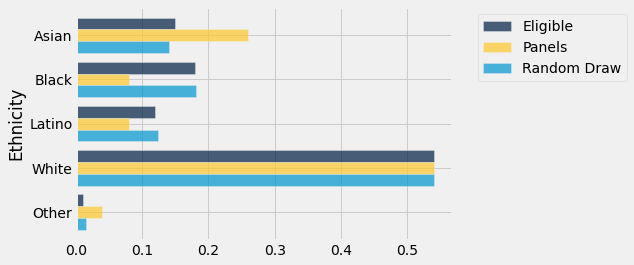

In [29]:
jury_with_random_draw.barh('Ethnicity')

##### How do we compute the tvd between the random draw and the model?

##### How does this compare with the tvd between the panels and the model, i.e. the observed sample? 

### Now let's simulate 10K random samples now

In [35]:
def simulated_tvd():
    return tvd(sample_proportions(1453, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    sample_distribution = sample_proportions(1453, model)
    new_tvd = tvd(sample_distribution, model)
    tvds = np.append(tvds, new_tvd)

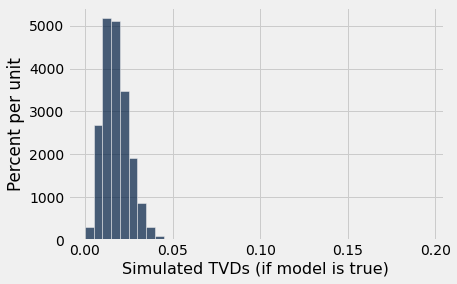

In [40]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .2, .005)

Table().with_column(title, tvds).hist(bins = bins)

##### What does this histogram show? 

<details>
<summary>Solution</summary>
  It shows the model's prediction.

</details>


##### Is this similar to what we actually saw in the data? 

<details>
<summary>Solution</summary>
  No. Let's compute that using `tvd()`

</details>

##### Therefore, is the observed data (the sample that happened in the world) consistent with the model?
<details>
<summary>Solution</summary>
  No. It is very unlikely, or almost unlikely for the tvd to be 0.14

</details>

(back to slides)